In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.gridspec import GridSpec

# Parte A (Modelo logístico e isoclinas)

Durante el periodo de 1790 a 1930 la población de Estados Unidos $P(t)$ ($t$ en años) creció de 3.9 millones a 123.2 millones. 

En este lapso, $P(t)$ permaneció cercana a la solución del problema de valor inicial:

$$\frac{dP}{dt} = 0.03135P − 0.0001489P^2 , P(0) = 3.9$$

## Análisis del modelo logístico:
### Ecuación de población general:
Supóngase que la población cambia sólo por la ocurrencia de nacimientos y muertes —se considera que no hay inmigración o emigración de poblaciones de fuera o condiciones de tipo ambiental—. Es común tratar el crecimiento o disminución de una población en términos de funciones de las tasas de natalidad y mortalidad definidas como sigue:
 - $ \beta(t)$ es el número de nacimientos por unidad de población por unidad de tiempo en el tiempo t.
 - $\delta(t)$ es el número de muertes por unidad de población por unidad de tiempo en el tiempo t.
 Entonces, el número de nacimientos y muertes que se registran durante el intervalo
de tiempo $[t, t +\Delta t]$ está dado (aproximadamente) por
$$nacimientos: \beta (t) \cdot P(t) \cdot \Delta t  \hspace{1cm} muertes:\delta (t)\cdot P(t)\Delta t$$

Por tanto, el cambio $\Delta P$ en la población durante el intervalo de tiempo $[t, t +
\Delta t]$ de longitud $\Delta t$ es
$$\Delta P = [nacimientos] - [muertes] ≈ β(t) · P(t) · \Delta t − δ(t) · P(t) · \Delta t,$$
así
$$ \frac{\Delta P}{\Delta t}≈ [β(t) − δ(t)] P(t).$$

El error en esta aproximación debe tender a cero conforme $\Delta t \rightarrow  0$, para que —tomando el límite— se obtenga la ecuación diferencial

$$ \frac{dP}{dt}≈ [β − δ] P(t) \hspace{3cm} (1)$$
La ecuación (1) es la ecuación de población general. Si $\beta$ y $\delta$ son constantes, la ecuación (1) se reduce a la ecuación de crecimiento natural con $k = \beta - \delta$. Pero aquí se incluye también la posibilidad de que $\beta$ y $\delta$ sean funciones variables de t. Las tasas de nacimiento y mortalidad no necesitan conocerse de antemano; pueden depender de la función desconocida P(t).

### Poblaciones acotadas ecuación logística:
En situaciones tan diversas como la población humana de una nación o la población de moscas de la fruta en un contenedor cerrado, se ha observado que la tasa de nacimientos decrece en la medida en que la población se incrementa. Las razones pueden ser múltiples, desde una mayor sofisticación científica o cultural, hasta una limitación en el suministro de alimentos. Suponga, por ejemplo, que la tasa de nacimientos $\beta$ es una función lineal decreciente del tamaño de la población $P$, tal que $\beta = \beta_0 - \beta_1 \cdot P$, donde $\beta_0$ y $\beta_1$ son constantes positivas. Si la tasa de mortalidad $\delta = \delta_0$ permanece constante, entonces la ecuación (1) toma la forma



$$ \frac {dP}{dt}=( \beta_0 -\beta_1 P - \delta_0 )P $$

esto es,


$$\frac {dP}{dt}=aP-bP^2  \hspace{3cm}(2)$$

donde $a=\beta_0-\delta_0$ y $b=\beta_1$.

Si los coeficientes $a$ y $b$ son positivos, entonces la ecuación (2) se llama ecuación logística. Con el propósito de relacionar el comportamiento de la población $P(t)$ con los valores de los parámetros en la ecuación, es conveniente reescribir la ecuación logística en la forma
$$\frac {dP}{dt}=kP(M-P)\hspace{3cm}(3)$$
donde $k=b$ y $M=a/b$ son constantes.


### Poblaciones limitadas y capacidad máxima:
La solución al problema de valor incial (3) es:
$$P(t)=\frac {MP_0}{P_0+(M-P_0)e^{-kMt} }$$

### Análisis del comportamiento de poblaciones logísticas:

Las poblaciones reales de animales son valores positivos. Si $P_0 = M$, entonces la ecuación (3) se reduce a la "población de equilibrio", sin cambio (valores constantes) $P(t) = M$. De otra manera, el comportamiento de una población logística depende de si $0 < P_0 < M$ o $P_0 > M$.

**Caso 1:** Si $0 < P_0 < M$, entonces se observa de la solución que $P'(t) > 0$ y

$$P(t) = \frac{MP_0}{P_0 + (M - P_0)e^{-kMt}} = \frac{MP_0}{P_0 + \{\text{número pos.}\}} < \frac{MP_0}{P_0} = M$$

**Caso 2:** Sin embargo, si $P_0 > M$, entonces se observa que $P'(t) < 0$ y

$$P(t) = \frac{MP_0}{P_0 + (M - P_0)e^{-kMt}} = \frac{MP_0}{P_0 + \{\text{número neg.}\}} > \frac{MP_0}{P_0} = M$$

En ambos casos, el "número positivo" o el "número negativo" en el denominador tienen valor absoluto menor que $P_0$ y —debido al factor exponencial— se acercan a cero conforme $t \to \infty$. De aquí se concluye que

$$\lim_{t \to \infty} P(t) = \frac{MP_0}{P_0 + 0} = M \hspace{3cm}(4)$$

Así, una población que satisface la ecuación logística no crece fuera de límite, como ocurre con el crecimiento natural de una población modelada por la ecuación exponencial $P'(t) = kP$. En su lugar, se aproxima a una población límite finita $M$ conforme $t \to \infty$. 

La población $P(t)$ se incrementa para tender al estado permanente $M$ desde abajo si $0 < P_0 < M$, pero disminuye tendiendo a $M$ desde arriba si $P_0 > M$. A $M$ se le conoce como la **capacidad máxima del medio ambiente**, y se considera como la población máxima que éste puede soportar en el largo plazo.


## Representación del Problema como Ecuación Diferencial Ordinaria

### 1. Formulación del Problema de Valor Inicial (PVI)

**Ecuación Diferencial:**
$$\frac{dP}{dt} = 0.03135P - 0.0001489P^2$$

**Condición Inicial:**
$$P(0) = 3.9 \text{ millones}$$

**Dominio temporal:** $t \in [0, 140]$ años (1790-1930)

### 2. Identificación y Análisis de Parámetros

#### 2.1 Parámetros del Modelo Logístico

**Forma estándar:** $\frac{dP}{dt} = aP - bP^2$

- **$a = 0.03135$** (tasa de crecimiento intrínseco)
  - **Unidades:** $\text{año}^{-1}$
  - **Interpretación:** Tasa neta de crecimiento poblacional en ausencia de limitaciones
  - **Valor biológico:** $a = \beta_0 - \delta_0$ (diferencia entre tasa de natalidad base y mortalidad base)

- **$b = 0.0001489$** (coeficiente de competencia intraespecífica)
  - **Unidades:** $\text{millones}^{-1} \cdot \text{año}^{-1}$
  - **Interpretación:** Parámetro que cuantifica el efecto limitante del crecimiento poblacional
  - **Valor biológico:** $b = \beta_1$ (reducción de natalidad por unidad de población)

#### 2.2 Parámetros Derivados

**Capacidad de carga:**
$$M = \frac{a}{b} = \frac{0.03135}{0.0001489} = 210.61 \text{ millones}$$

**Parámetro de crecimiento logístico:**
$$k = a = 0.03135 \text{ año}^{-1}$$

### 3. Condiciones Iniciales y su Significado

#### 3.1 Valor Inicial
- **$P_0 = 3.9$ millones** (población de EE.UU. en 1790)
- **Contexto histórico:** Primer censo oficial de Estados Unidos
- **Relación con capacidad de carga:** $P_0/M = 3.9/210.61 = 0.0185$ (1.85% de la capacidad)

#### 3.2 Condiciones de Contorno Implícitas
- **$P(t) > 0$** para todo $t \geq 0$ (positividad poblacional)
- **$P(t) < M$** para $P_0 < M$ (crecimiento acotado)

### 4. Contexto Físico y Biológico

#### 4.1 Fundamentos Ecológicos

**Hipótesis del Modelo:**
1. **Población cerrada:** No hay migración neta significativa
2. **Ambiente homogéneo:** Recursos distribuidos uniformemente
3. **Capacidad de carga constante:** Ambiente estático durante el período
4. **Competencia intraespecífica:** Individuos compiten por recursos limitados

#### 4.2 Mecanismos Biológicos

**Procesos demográficos modelados:**

1. **Crecimiento exponencial inicial** ($aP$):
   - **Natalidad:** Reproducción sin limitaciones cuando $P \ll M$
   - **Mortalidad base:** Muertes por causas no relacionadas con densidad
   - **Tasa neta:** $r = a = 3.135\%$ anual

2. **Regulación densodependiente** ($-bP^2$):
   - **Competencia por recursos:** Alimento, territorio, habitat
   - **Estrés poblacional:** Enfermedades, conflictos intraespecíficos
   - **Reducción de fertilidad:** Menor éxito reproductivo a alta densidad

#### 4.3 Contexto Histórico-Geográfico

**Período de estudio (1790-1930):**
- **Expansión territorial:** Compra de Luisiana (1803), anexión de territorios
- **Revolución industrial:** Mejoras en medicina, agricultura, transporte
- **Urbanización creciente:** Transición de sociedad rural a urbana
- **Migración limitada:** Modelo válido para migración neta constante

**Factores ambientales:**
- **Recursos abundantes:** Territorio virgen, recursos naturales extensos
- **Capacidad tecnológica:** Agricultura mecanizada, medicina preventiva
- **Estabilidad política:** Crecimiento económico sostenido



## Solución de la EDO Logística por Variables Separables

### Problema de Valor Inicial

$$\frac{dP}{dt} = 0.03135P - 0.0001489P^2, \qquad P(0) = 3.9$$

---

### Paso 1: Separación de Variables

Factorizamos el lado derecho:

$$\frac{dP}{dt} = P(0.03135 - 0.0001489P)$$

Separamos las variables:

$$\frac{dP}{P(0.03135 - 0.0001489P)} = dt$$

---

### Paso 2: Resolver la EDO por Separación de Variables

$$\frac{dP}{0.03135P - 0.0001489P^2} = dt$$

$$\frac{dP}{P(0.03135 - 0.0001489P)} = dt$$

#### Usando Fracciones Parciales:

Necesitamos descomponer:

$\frac{1}{P(0.03135 - 0.0001489P)} = \frac{A}{P} + \frac{B}{0.03135 - 0.0001489P}$

**Multiplicamos ambos lados por el denominador común $P(0.03135 - 0.0001489P)$:**

$1 = A(0.03135 - 0.0001489P) + BP$

**Igualando coeficientes**

Expandimos:

$1 = 0.03135A - 0.0001489AP + BP$

$1 = 0.03135A + P(-0.0001489A + B)$

Igualando coeficientes:
- Término constante: $1 = 0.03135A$
- Coeficiente de $P$: $0 = -0.0001489A + B$

De la primera ecuación:

$A = \frac{1}{0.03135} = 31.8979 \approx 31.90$

De la segunda ecuación:

$B = 0.0001489A = 0.0001489(31.8979) = 0.004748$

#### Integrando:

$$\int \frac{31.90}{P} dP + \int \frac{31.90}{0.03135 - 0.0001489P} dP = \int dt$$

$$31.90\ln|P| - 31.90\ln|0.03135 - 0.0001489P| = t + C$$

$$\ln\left|\frac{P}{0.03135 - 0.0001489P}\right| = \frac{t}{31.90} + C_1$$

---

### Paso 3: Aplicar Condición Inicial

Con $P(0) = 3.9$:

$$\ln\left|\frac{3.9}{0.03135 - 0.0001489(3.9)}\right| = C_1$$

$$\ln\left|\frac{3.9}{0.03135 - 0.00058}\right| = \ln\left|\frac{3.9}{0.03077}\right| = \ln(126.75) = C_1$$

$$C_1 \approx 4.843$$

---

### Paso 4: Solución General

$$\frac{P}{0.03135 - 0.0001489P} = 126.75e^{0.03135t}$$

Despejando $P$:

$$P = \frac{210.61 \times 126.75e^{0.03135t}}{1 + 126.75e^{0.03135t}}$$

$$P(t) = \frac{26,694.81e^{0.03135t}}{1 + 126.75e^{0.03135t}}$$

**O de forma equivalente:**

$$P(t) = \frac{210.61}{1 + 53.00e^{-0.03135t}}$$

---


### Preguntas clave:

1. ¿Qué población se predice para 1930?

Para $t = 140$ años:

$$P(140) = \frac{210.61}{1 + 53.00e^{-0.03135(140)}} = \frac{210.61}{1.659} \approx 126.9 \text{ millones}$$


2. ¿Qué población límite se pronostica?

$$\lim_{t \to \infty} P(t) = 210.61 \text{ millones}$$


3. ¿Esta ecuación logística ha continuado siendo precisa desde 1930 para modelar a la población de Estados Unidos?

**No**, la población de EE.UU. actualmente supera los 335 millones, muy por encima del límite predicho de 210.61 millones.


### Validación del Modelo

#### Verificación de Supuestos
- **$a > 0$:** ✓ Crecimiento poblacional observado
- **$b > 0$:** ✓ Desaceleración del crecimiento hacia 1930
- **$P_0 < M$:** ✓ Población inicial muy por debajo de la capacidad

#### Significado de los Resultados
- **Predicción 1930:** $P(140) = 126.9$ millones vs. **123.2 millones observados**
- **Error relativo:** $\frac{126.9 - 123.2}{123.2} = 3.0\%$
- **Precisión notable:** Modelo predictivo exitoso para 90 años

Este análisis demuestra que el modelo logístico captura adecuadamente la dinámica poblacional de Estados Unidos durante su fase de expansión demográfica inicial, antes de que factores no contemplados en el modelo (migración masiva, cambios tecnológicos, transición demográfica) alteraran significativamente los patrones de crecimiento.

4. Dibuje el campo de isoclinas en el plano $(t, P)$ para esta ecuación y analice cualitativamente la convergencia hacia la capacidad máxima.

(Issue #A.10)

[Este problema está basado en el modelo de Verhulst, quien en 1845 utilizó los datos de la
población de Estados Unidos del periodo 1790-1840 para predecir con precisión su evolución
hasta el año 1930 (por supuesto, mucho después de su propia muerte).]

### Planteamiento del Problema:

(Determinar si el problema está bien planteado (existencia, unicidad y estabilidad de soluciones)) 

(Issue #A.7)

### Análisis numérico:

#### Condicionamiento del Problema:

Evaluar la condición del problema (sensibilidad a cambios en datos iniciales)

(Issue #A.9)

#### Algoritmos Numéricos:

In [3]:
A = 0.03135
B = 0.0001489

def f(y,x):
    return A * y - B * y**2
def f_inv(y_points):
    x_points = []
    for y in y_points:
        x = - math.log(((210.61/y)-1)/53)/0.03135
        x_points.append(x)

    return x_points


##### Método de Euler Mejorado

(Issue #A.3) (Implementar y determinar orden de convergencia y complejidad computacional)

In [4]:
def improved_euler(f, x0, y0, h, xf):
    """
    :param f: The function to evaluate
    :param x0: Starting point X
    :param y0: Starting point Y
    :param h: Step size
    :param xf: Final point X
    :return: (numpy.ndarray, numpy.ndarray): first -> x_values, second -> approximated_y_values
    """
    n_steps = int(np.ceil((xf - x0) / h))

    x_points = np.zeros(n_steps + 1)
    y_points = np.zeros(n_steps + 1)

    x_points[0] = x0
    y_points[0] = y0

    for i in range(n_steps):
        x_i = x_points[i]
        y_i = y_points[i]


        slope1 = f(y_i, x_i)
        step1 = y_i + h * slope1

        slope2 = f(step1, x_i + h)
        step2 = y_i + (h/2.0) * (slope1 + slope2)

        x_points[i+1] = x_i + h
        y_points[i+1] = step2

    return x_points, y_points

#### Método Runge Kutta de orden 4
##### Orden de Convergencia:
- $O(h^4)$ donde h es el tamaño del paso.
##### Complejidad computacional:
- $O(n)$ donde n es la cantidad de pasos a dar.

In [ ]:

def runge_kutta_4(f, x0, y0, h, target_x):
    """
    Fourth order Ruge-Kutta method:
    f: function representing the ODE dy/dx = f(y, x)
    x0: initial x value
    y0: initial y value
    h: step size
    target_x: target x value
    Returns arrays of x and y values
    """
    x_vals = [x0]
    y_vals = [y0]
    n_steps=int((target_x - x0) / h)
    for i in range(n_steps):
        x = x_vals[-1]
        y = y_vals[-1]
        
        k1 = h * f(y, x)
        k2 = h * f(y + k1/2, x + h/2)
        k3 = h * f(y + k2/2, x + h/2)
        k4 = h * f(y + k3, x + h)
        
        y_new = y + (k1 + 2*k2 + 2*k3 + k4) / 6
        x_new = x + h
            
        x_vals.append(x_new)
        y_vals.append(y_new)
            
    return np.array(x_vals), np.array(y_vals)

##### Método de Pasos Múltiples 

(Issue #A.4) (Implementar y determinar orden de convergencia y complejidad computacional)

(Comparación entre los algoritmos anteriores y uso de benchmark para análisis de precisión)

(Issue #A.6)

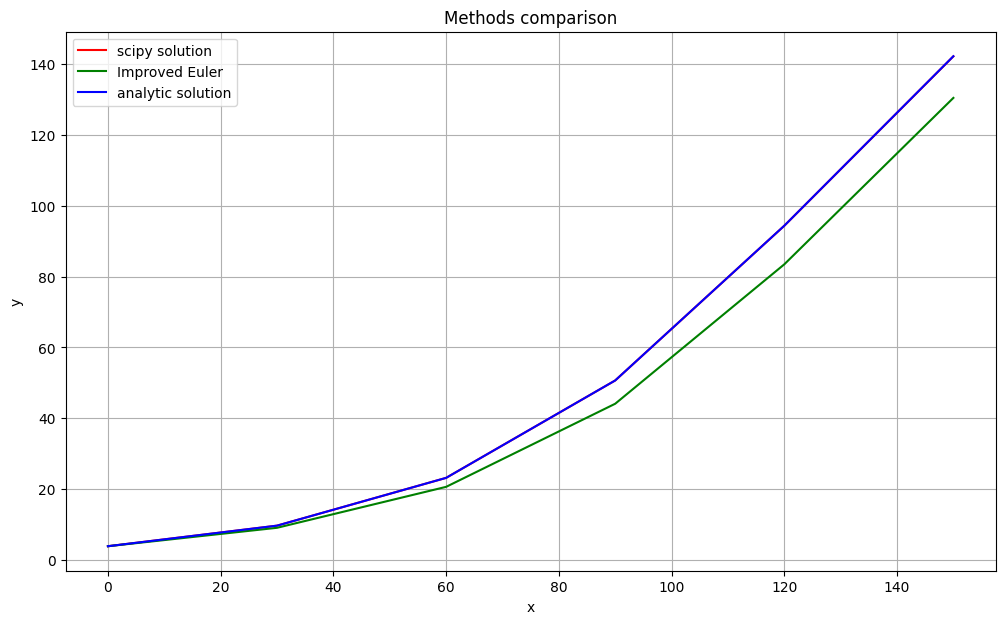

In [5]:
# Param
x0 = 0
y0 = 3.9
xf = 130
h = 30

def analystic_f(t):
    return 210.61/(1 + 53 * (np.e ** (-0.03135*t)))

t_span = np.arange(x0, xf + h, h)

analystic_solution = [analystic_f(t) for t in t_span]

#Scipy solution
scipy_solution = odeint(f, y0, t_span).flatten()

#Add others methods here
x_euler_imp, y_euler_imp = improved_euler(f, x0, y0, h, xf)

plt.figure(figsize=(12, 7))
plt.plot(t_span, scipy_solution, 'r-', label='scipy solution')
plt.plot(t_span, y_euler_imp, 'g-', label='Improved Euler')
plt.plot(t_span, analystic_solution, 'b-', label='analytic solution')
plt.title('Methods comparison')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

#### Análisis del Error:

##### Benchmmarks:

In [52]:
# Benchmark: Comparison of numerical methods with analytical solution

# Exact analytical solution for t=140 years
analytic_result = 126.949969861  

def logistic_model(P, t): 
    """
    Logistic population growth model.
    
    Parameters:
    -----------
    P : float
        Population (dependent variable) in millions
    t : float
        Time (independent variable) in years
        
    Returns:
    --------
    float
        Rate of population change dP/dt
    """
    dPdt = 0.03135 * P - 0.0001489 * P**2  
    return dPdt 

# Problem parameters
P0 = 3.9  # Initial population in millions (1790 US Census)
t_span = np.linspace(0, 140, 141)  # Time span from 0 to 140 years

# Solution using scipy.odeint
scipy_solution = odeint(logistic_model, P0, t_span)

print("=== NUMERICAL METHODS BENCHMARK ===")
print(f"Analytical solution (t=140): {analytic_result:.6f} millions")
print(f"SciPy odeint solution (t=140): {scipy_solution[-1][0]:.6f} millions")

=== NUMERICAL METHODS BENCHMARK ===
Analytical solution (t=140): 126.949970 millions
SciPy odeint solution (t=140): 127.008330 millions


Realizar análisis de error: error relativo, análisis hacia adelante (perturbaciones en datos) y
hacia atrás (estabilidad del algoritmo)

(Issue #A.8)


Comparing methods with LINEAR error scale


C:\Users\Adrian\AppData\Local\Temp\ipykernel_4012\2207034154.py:93: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96])


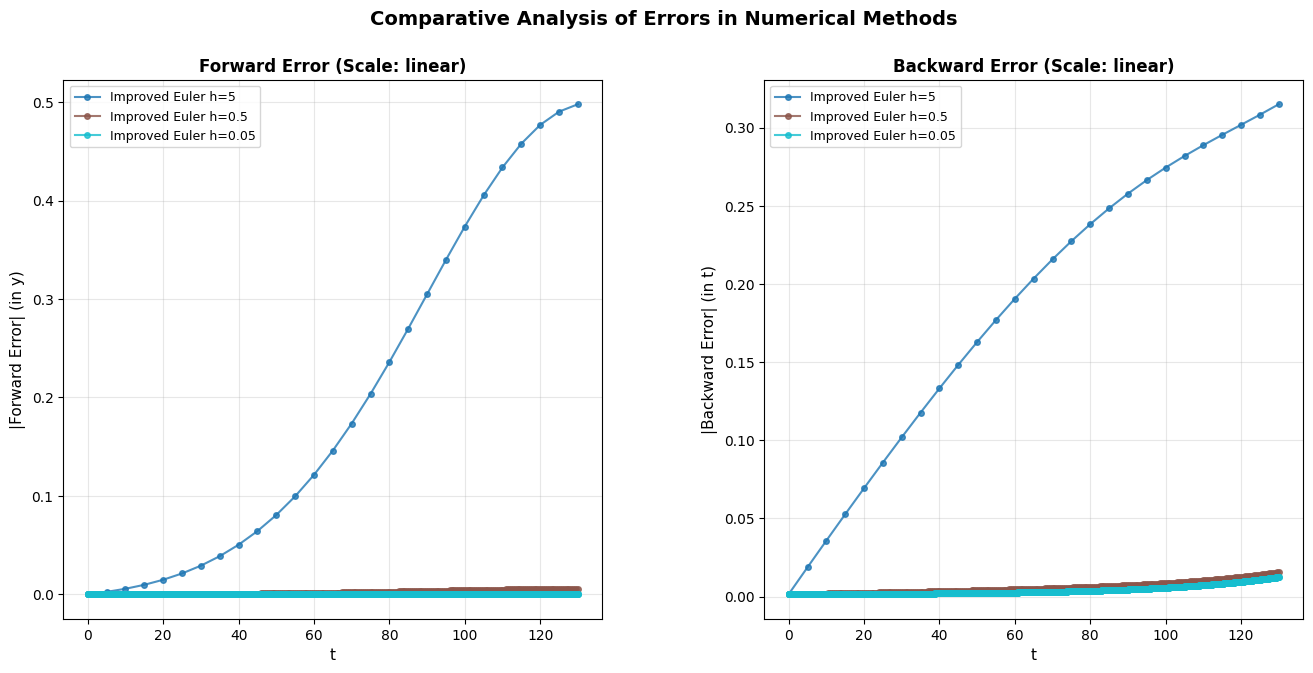


Comparing methods with LOGARITHMIC error scale


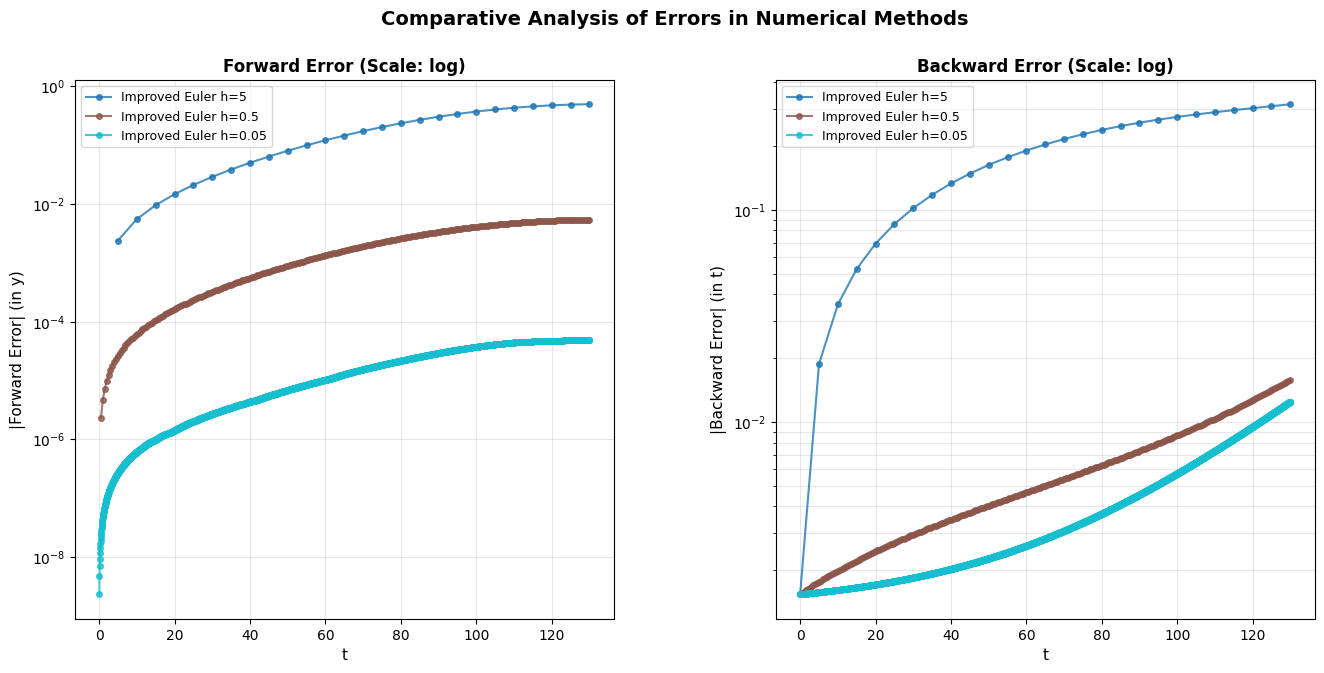

In [6]:
def compare_numerical_methods(f, t0, y0, tf, methods_config, scale='log'):
    """
    Compares multiple numerical methods and plots their errors.

    Parameters:
    -----------
    f : callable
        Function dy/dt = f(y, t).
    t0, y0, tf : float
        Initial conditions and time limit.
    methods_config : list of dict
        Configuration for the methods to be compared.
        Example: [
            {'name': 'Improved Euler', 'method': improved_euler, 'h': 0.1},
            {'name': 'RK4', 'method': rk4, 'h': 0.1}
        ]
    scale : str, optional
        The scale for the y-axis of the error plots. Can be 'linear' or 'log'. Defaults to 'log'.
    """

    h_ref = 0.001
    t_ref = np.arange(t0, tf + h_ref, h_ref)
    y_ref = odeint(f, y0, t_ref).flatten()

    fig = plt.figure(figsize=(16, 7))
    gs = GridSpec(1, 2, figure=fig, hspace=0.3, wspace=0.3)

    # Generate a set of distinct colors for the plots from the 'tab10' colormap.
    # numpy.linspace returns evenly spaced numbers over a specified interval.
    colors = plt.cm.tab10(np.linspace(0, 1, len(methods_config)))

    # --- Calculate Numerical Solutions ---
    results = {}
    for config in methods_config:
        name = config['name']
        method = config['method']
        h = config['h']
        t_num, y_num = method(f, t0, y0, h, tf)
        results[name] = {'t': t_num, 'y': y_num, 'h': h}

    # ========== PLOT 1: Forward Error at Each Step ==========
    ax1 = fig.add_subplot(gs[0, 0])

    for idx, config in enumerate(methods_config):
        name = config['name']
        t_num = results[name]['t']
        y_num = results[name]['y']

        y_ref_interp = np.interp(t_num, t_ref, y_ref)
        forward_error = np.abs(y_num - y_ref_interp)

        # Use the chosen scale for the plot
        if scale == 'log':
            plot_data = forward_error.copy()
            # Replace 0 with NaN to avoid log scale errors
            plot_data[plot_data == 0] = np.nan
            ax1.semilogy(t_num, plot_data, 'o-', label=name, color=colors[idx], markersize=4, alpha=0.8)
        else:
            ax1.plot(t_num, forward_error, 'o-', label=name, color=colors[idx], markersize=4, alpha=0.8)

    ax1.set_xlabel('t', fontsize=11)
    ax1.set_ylabel('|Forward Error| (in y)', fontsize=11)
    ax1.set_title(f'Forward Error (Scale: {scale})', fontsize=12, fontweight='bold')
    ax1.legend(loc='best', fontsize=9)
    ax1.grid(True, alpha=0.3, which='both')

    # ========== PLOT 2: Backward Error at Each Step ==========
    ax2 = fig.add_subplot(gs[0, 1])

    for idx, config in enumerate(methods_config):
        name = config['name']
        t_num = results[name]['t']
        y_num = results[name]['y']

        t_inv = f_inv(y_num)
        backward_error = np.abs(t_num - t_inv)

        if scale == 'log':
            plot_data = backward_error.copy()
            # Replace 0 with NaN to avoid log scale errors
            plot_data[plot_data == 0] = np.nan
            ax2.semilogy(t_num, plot_data, 'o-', label=name, color=colors[idx], markersize=4, alpha=0.8)
        else:
            ax2.plot(t_num, backward_error, 'o-', label=name, color=colors[idx], markersize=4, alpha=0.8)

    ax2.set_xlabel('t', fontsize=11)
    ax2.set_ylabel('|Backward Error| (in t)', fontsize=11)
    ax2.set_title(f'Backward Error (Scale: {scale})', fontsize=12, fontweight='bold')
    ax2.legend(loc='best', fontsize=9)
    ax2.grid(True, alpha=0.3, which='both')

    plt.suptitle('Comparative Analysis of Errors in Numerical Methods', fontsize=14, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    return results

# ============================================================================
# USAGE EXAMPLE
# ============================================================================

if __name__ == "__main__":

    # Initial conditions
    t0 = 0
    y0 = 3.9
    tf = 130

    # Compare the same method with different step sizes (h)
    methods_h_config = [
        {'name': 'Improved Euler h=5', 'method': improved_euler, 'h': 5},
        {'name': 'Improved Euler h=0.5', 'method': improved_euler, 'h': 0.5},
        {'name': 'Improved Euler h=0.05', 'method': improved_euler, 'h': 0.05},
    ]

    # --- Generate plot with LINEAR scale ---
    print("\nComparing methods with LINEAR error scale")
    compare_numerical_methods(f, t0, y0, tf, methods_h_config, scale='linear')

    # --- Generate plot with LOGARITHMIC scale ---
    print("\nComparing methods with LOGARITHMIC error scale")
    compare_numerical_methods(f, t0, y0, tf, methods_h_config, scale='log')